# <center> Amazon_Food_Review

#### Context
- This dataset consists of reviews of fine foods from amazon. 
- The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. 
- Reviews include product and user information, ratings, and a plain text review. 
- It also includes reviews from all other Amazon categories.

- source: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

#### Data includes:

- Reviews from Oct 1999 - Oct 2012
- 568,454 reviews
- 256,059 users
- 74,258 products
- 260 users with > 50 reviews

### Problem Statement
- You have to find the overall sentiment of population based on text reviews of customers using pretrained model like TextBlob and VADER.

## Sentiment Analysis using textblob

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Importing data 
data = pd.read_csv('AmazonFoodReviews.csv')

In [16]:
# Displaying first five records
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [17]:
# Displaying bottom five records
data.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [18]:
# shape of dataset
data.shape

(568454, 10)

In [19]:
# size of dataset
data.size

5684540

In [20]:
# Summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


- In this dataset we have total 568454 entries and 10 columns.
- Out of all columns 5 are categorical and 5 are numerical in nature.
- 'ProfileName' and 'Summary' have missing values.

In [21]:
# Statistical insights of data
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


- ID is ranging from 0 to 568454.
- In score column we ca see average rating is 4.18.

In [22]:
# Statistical insights of catagorical data
data.describe(include='object')

,ProductId,UserId,ProfileName,Summary,Text
count,568454,568454,568438,568427,568454
unique,74258,256059,218416,295742,393579
top,B007JFMH8M,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",Delicious!,"This review will make me sound really stupid, ..."
freq,913,448,451,2462,199


- In this dataset we have total 74258 unique products and 256059 users,

In [23]:
# Total number unique products
print('The total nummber of unique records is: ',len(data.ProductId.unique()))
print('The products and their respective occurance are: \n',data.ProductId.value_counts())

The total nummber of unique records is:  74258
The products and their respective occurance are: 
 B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
             ... 
B004DSPTTM      1
B008C9QWU8      1
B007O5A6BM      1
B003Q4TZ08      1
B001LR2CU2      1
Name: ProductId, Length: 74258, dtype: int64


In [24]:
# Checking for nulls
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [25]:
# Dropping the nulls 
data.dropna(inplace=True)

In [29]:
# Checking for duplicates
data.duplicated().any()

False

- Now in dataset we dont have any nulls as well as duplicated rows.

In [11]:
# In this dataset we are going to perform analysis on 'Summary' column to find overall sentiment of product or food.
# We will use module named TextBlob for this analysis.

In [30]:
# TextBlob is a Python library that offers a simple API for common NLP tasks, including sentiment analysis. 
# It provides a pre-trained sentiment analysis model that assigns polarity scores to text.

In [31]:
# Creating a copy of dataset
df = data.copy(deep=True)

In [32]:
# Importing textblob
from textblob import TextBlob

In [36]:
# Example
text = df.Summary[55]
print(text)
a = TextBlob(df.Summary[55])
a.sentiment

Our guests love it!


Sentiment(polarity=0.625, subjectivity=0.6)

- Polarity score ranges from -1 to +1.
- Positive polarity explains posoitive sentiment and vice versa.

In [37]:
# Creating a for loop to calculate polarity score of each summary in dataset
pol_list = []                          # creating an empty list for stoaring polarity values of dataset
for i in range (0, df.shape[0]):     # Iterating through the data.Summary to generate polarity values for each sentiment
    blob = TextBlob(df.Summary.iloc[i])
    pol_list.append(blob.sentiment[0])

In [38]:
# Adding new column to dataset
df['Summary_blob_score'] = pol_list
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Summary_blob_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8


In [40]:
df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Summary_blob_score
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0.00
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,-0.75
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.00
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,0.50
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,...",0.80


In [39]:
# Statistical insights of Summary_blob_score
df['Summary_blob_score'].describe()

count    568411.000000
mean          0.337296
std           0.443412
min          -1.000000
25%           0.000000
50%           0.300000
75%           0.700000
max           1.000000
Name: Summary_blob_score, dtype: float64

- Average of polarity score is 0.33 which is slightly on posive side.

In [41]:
# Lets check how many positive comments we have
textblob_positive_sent = df[df.Summary_blob_score > 0]
textblob_positive_sent.shape

(331657, 11)

- More than half of reviews are positive.  

In [48]:
# total nummber of unique records with positive sentiment
print('The total number of products with positive sentiment is: ',len(textblob_positive_sent.ProductId.unique()))
print('Products with positive sentiments are :- \n',textblob_positive_sent.ProductId.value_counts())         

The total number of products with positive sentiment is:  57413
Products with positive sentiments are :- 
 B007JFMH8M    587
B003B3OOPA    432
B000NMJWZO    400
B001EO5Q64    399
B006HYLW32    354
             ... 
B002UZZAIU      1
B001VNEDNU      1
B003TWZB0U      1
B003SOEAME      1
B001LR2CU2      1
Name: ProductId, Length: 57413, dtype: int64


In [46]:
# Lets check how many negative comments we have
textbolo_negative_sent = df[df.Summary_blob_score < 0]
textbolo_negative_sent.shape

(52516, 11)

In [47]:
df[df.Summary_blob_score < 0].head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Summary_blob_score
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,-0.400
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",-1.000
57,58,B004N5KULM,ASCNNAJU6SXF8,S. Beck,1,1,5,1336176000,How can you go wrong!,"It is chocolate, what can I say. Great variet...",-0.625
61,62,B004N5KULM,A7ZK2A3VIW7X9,Peggy,0,2,5,1319414400,pretty expensive,"This bag of candy online is pretty expensive, ...",-0.125
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...,-0.500


In [49]:
# total nummber of unique records with negative sentiment
print('The total number of products with negative sentiment is: ',len(textbolo_negative_sent.ProductId.unique()))
print('Products with negative sentiments are :- \n',textbolo_negative_sent.ProductId.value_counts())         

The total number of products with negative sentiment is:  20832
Products with negative sentiments are :- 
 B000KV61FC    95
B000KV7ZGQ    95
B000X1Q1G8    72
B002IEZJMA    71
B0083T5TAQ    70
              ..
B000U9WZ90     1
B000CONM8Q     1
B001E1ATG4     1
B000WJIJ1Q     1
B003S1WTCU     1
Name: ProductId, Length: 20832, dtype: int64


In [50]:
# Lets check how many comments are neutral
textblob_neutral_sent = df[df.Summary_blob_score == 0]
textblob_neutral_sent.shape

(184238, 11)

In [51]:
df[df.Summary_blob_score == 0].head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Summary_blob_score
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,0.0
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,0.0


In [53]:
# total nummber of unique records with neutral sentiment 
print('The total number of products with neutral sentiment is: ',len(textblob_neutral_sent.ProductId.unique()))
print('Products with neutral sentiments are :- \n',textblob_neutral_sent.ProductId.value_counts())  

The total number of products with neutral sentiment is:  44641
Products with neutral sentiments are :- 
 B007JFMH8M    307
B002QWHJOU    263
B002QWP89S    263
B002QWP8H0    263
B0026RQTGE    263
             ... 
B001IVUM5S      1
B000EA2EN2      1
B004JJSKDC      1
B0038ZHHSW      1
B00813GRG4      1
Name: ProductId, Length: 44641, dtype: int64


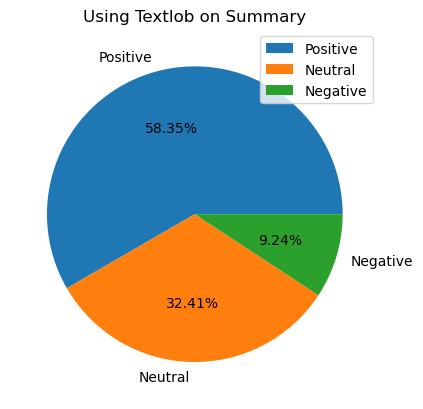

In [54]:
# Graphical representation using pie chart
x=['Positive', 'Neutral','Negative']
y=[331657, 184238, 52516]
plt.pie(y,labels=x,autopct='%1.2f%%')
plt.legend(loc='best')
plt.title('Using Textlob on Summary')
plt.show()

### Visual Representation using wordcloud

In [84]:
# Importing libraries
import spacy
import en_core_web_sm
from wordcloud import WordCloud

In [85]:
lang = spacy.load('en_core_web_sm') # Loading package

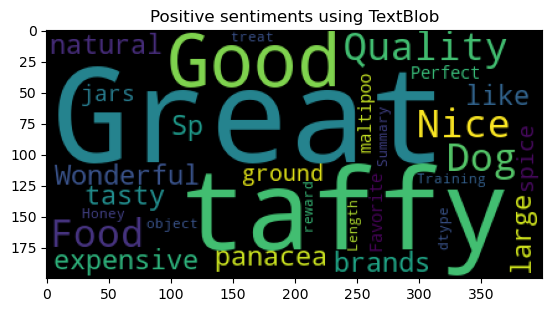

In [91]:
# Wordcloud of positive sentiments
cloud_1 = WordCloud(stopwords=lang.Defaults.stop_words, max_words=50).generate(str(df[df['Summary_blob_score'] > 0]['Summary']))
plt.title('Positive sentiments using TextBlob')
plt.imshow(cloud_1)
plt.show()

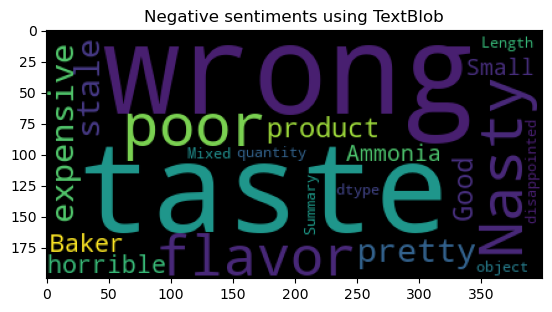

In [92]:
# Wordcloud of negative sentiments
cloud_2 = WordCloud(stopwords=lang.Defaults.stop_words, max_words=50).generate(str(df[df['Summary_blob_score'] < 0]['Summary']))
plt.title('Negative sentiments using TextBlob')
plt.imshow(cloud_2);

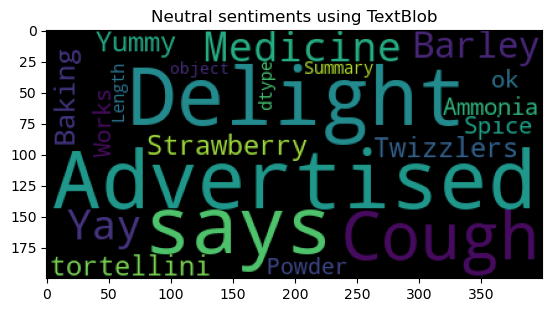

In [93]:
# Wordcloud of neutral sentiments
cloud3 = WordCloud(stopwords=lang.Defaults.stop_words, max_words=50).generate(str(df[df['Summary_blob_score'] == 0]['Summary']))
plt.title('Neutral sentiments using TextBlob')
plt.imshow(cloud3);

# Sentiment analysis using VADER

In [56]:
# Import preprocessed data from above analysis
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Summary_blob_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8


- In previous analysis we have used 'Summary' and TextBlob module.
- In this analysis will use 'Text' feature and VADER module.
- And lastly compare the result.

In [57]:
# VADER (Valence Aware Dictionary and sEntiment Reasoner): VADER is a rule-based sentiment analysis tool specifically designed for social media texts. 
# It's known for its simplicity and effectiveness in analyzing sentiment from short texts like tweets.

In [58]:
# Import library
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [59]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gaikw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [63]:
# Example
sent = SentimentIntensityAnalyzer()
print(df.Text[652])
sent.polarity_scores(df.Text[652])

I like "Vernor's", and drink it all the time. It is old fashioned drink from Michigan, since 1866, and the labeling was known for its lovely green and gold colors and the gnome character. If you look at the can it is actually called ginger soda instead of ale and is different than typical ginger ale in taste. Vernors has a strong vanilla presence, is smoother and more moist, and sweeter than a ginger ale. It is closer to a cream soda than ginger ale, very good. A ginger ale is more dry, higher in carbonation, and has a spicier bite to it. Vernors has 39 grams sugar per can, versus 33 grams per can for Schweppes Ginger Ale. Neither has caffeine.<br /><br />The recipe has changed a bit over the years mostly in the choice of sweeteners. They use the same high fructose corn syrup that the cost-cutting mega soda companies use, rather than the cane sugar they used to use. The down side to that is that the corn syrup syrup drowns out some of the flavors. Many microbrews are using cane sugar a

{'neg': 0.029, 'neu': 0.9, 'pos': 0.071, 'compound': 0.9377}

In [64]:
# Range of compound is from -1 to +1
# Posive compound --> positive sentiment
# Neutral compound --> Neutral sentiment
# Negative compound --> negative sentiment

In [65]:
# Using for loop to calculate compound score for each text
sent = SentimentIntensityAnalyzer()       # Applying analyzer to 'Text'
pol_list = []
for i in range (0 , df.shape[0]):
    score = sent.polarity_scores(df.Text.iloc[i])
    pol_list.append(score['compound'])

In [66]:
# Adding list of polarity score to dataset
df['Text_vader_score'] = pol_list  
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Summary_blob_score,Text_vader_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8,0.9468


In [67]:
# Positive sentiments
print('The total no. of positive sentiments using vader is:' ,len(df[df['Text_vader_score'] > 0]))
df[df['Text_vader_score'] > 0].head()

The total no. of positive sentiments using vader is: 499060


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Summary_blob_score,Text_vader_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.700000,0.9441
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.000000,0.8265
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.800000,0.9468
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,0.600000,0.8830
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,0.358333,0.9346


In [68]:
# Neutral sentiments
print('The total no. of neutral sentiments using vader is:' ,len(df[df['Text_vader_score'] == 0]))
df[df['Text_vader_score'] == 0].head()

The total no. of neutral sentiments using vader is: 7973


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Summary_blob_score,Text_vader_score
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0,0.0
25,26,B001GVISJM,A3FONPR03H3PJS,"Deborah S. Linzer ""Cat Lady""",0,0,5,1288310400,Twizzlers - Strawberry,Product received is as advertised.<br /><br />...,0.0,0.0
45,46,B001EO5QW8,A39Z97950MCTQE,K. A. Freel,0,0,3,1205193600,Hearty Oatmeal,This seems a little more wholesome than some o...,0.0,0.0
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...,-0.5,0.0
94,95,B0019CW0HE,A1DJAAKLPCJRZD,wendy,0,0,5,1329609600,So convenient,This is the same food we get at pet store. But...,0.0,0.0


In [69]:
# Negative sentiments
print('The total no. of negative sentiments using vader is:' ,len(df[df['Text_vader_score'] < 0]))
df[df['Text_vader_score'] < 0].head()

The total no. of negative sentiments using vader is: 61378


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Summary_blob_score,Text_vader_score
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.000000,-0.5664
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5,1282867200,"My cats LOVE this ""diet"" food better than thei...",One of my boys needed to lose some weight and ...,0.333333,-0.7579
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",-1.000000,-0.2960
50,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d...",0.000000,-0.5448
52,53,B000G6RPMY,A9L6L5H9BPEBO,Edwin C. Pauzer,1,1,4,1348876800,You'll go nuts over Ass-Kickin' Peanuts.,This wasn't in stock the last time I looked. I...,0.000000,-0.8259


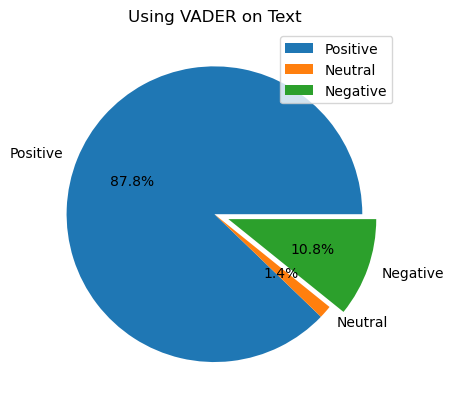

In [72]:
# Graphical representation using pie chart
x=['Positive', 'Neutral','Negative']
y=[499060, 7973, 61378]
plt.pie(y,labels=x,autopct='%1.1f%%',explode=[0,0,0.1])
plt.legend(loc='best')
plt.title('Using VADER on Text')
plt.show()

### Visual Representation using wordcloud

In [74]:
# Importing libraries
import spacy
import en_core_web_sm
from wordcloud import WordCloud

In [75]:
lang = spacy.load('en_core_web_sm') # Loading package

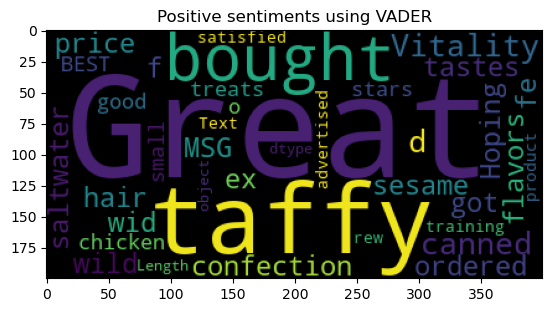

In [81]:
# Wordcloud of positive sentiments
cloud1 = WordCloud(stopwords=lang.Defaults.stop_words, max_words=50).generate(str(df[df['Text_vader_score'] > 0]['Text']))
plt.title('Positive sentiments using VADER')
plt.imshow(cloud1)
plt.show()

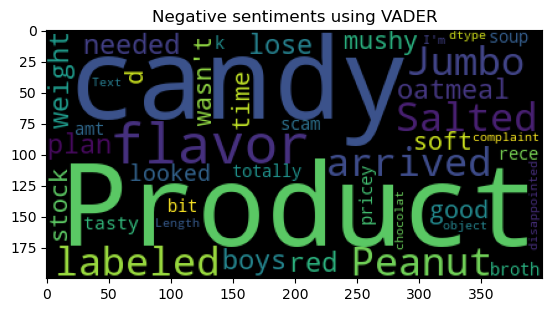

In [82]:
# Wordcloud of negative sentiments
cloud2 = WordCloud(stopwords=lang.Defaults.stop_words, max_words=50).generate(str(df[df['Text_vader_score'] < 0]['Text']))
plt.title('Negative sentiments using VADER')
plt.imshow(cloud2);

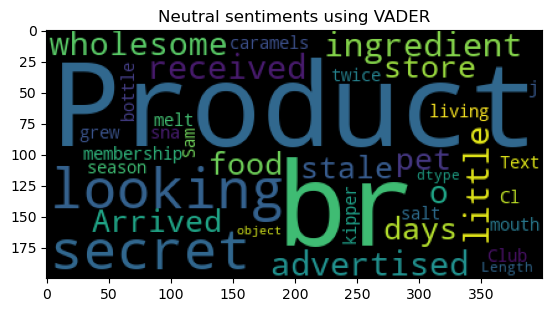

In [83]:
# Wordcloud of neutral sentiments
cloud3 = WordCloud(stopwords=lang.Defaults.stop_words, max_words=50).generate(str(df[df['Text_vader_score'] == 0]['Text']))
plt.title('Neutral sentiments using VADER')
plt.imshow(cloud3);